# Importing libraries

In [12]:
import pandas as pd
import numpy as np
from yaml import safe_load
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
file_names = []
for file in os.listdir('t20s'):
    file_names.append(os.path.join('t20s',file))

In [5]:
file_names[0:5]

['t20s\\1001349.yaml',
 't20s\\1001351.yaml',
 't20s\\1001353.yaml',
 't20s\\1004729.yaml',
 't20s\\1007655.yaml']

# Creating DF from Yaml files

In [8]:

counter = 1
dfs = []
for file in tqdm(file_names):
    with open(file, 'r') as f:
        df = pd.json_normalize(safe_load(f))
        df['match_id'] = counter
        dfs.append(df)
        counter += 1



100%|█████████████████████████████████████████████████████████████████████████████▉| 1432/1433 [05:48<00:00,  4.10it/s]


NotImplementedError: 

In [49]:
final_df = pd.concat(dfs,ignore_index=True)

In [50]:
final_df.head(2)

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,...,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,[2017-02-17],male,T20,5.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,[2017-02-19],male,T20,2.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
backup = final_df.copy()

# Droping Unnecessary columns

In [56]:
final_df.drop(columns=['meta.data_version',
                       'meta.created',
                       'meta.revision',
                       'info.outcome.bowl_out',
                       'info.bowl_out',
                       'info.supersubs.South Africa',
                       'info.supersubs.New Zealand',
                       'info.outcome.eliminator',
                       'info.outcome.result',
                       'info.outcome.method',
                       'info.neutral_venue',
                       'info.match_type_number',
                      'info.outcome.by.wickets',
                       'info.outcome.by.runs'
                      ],inplace=True)

# Remaining columns

In [59]:
final_df.head(2)

,innings,info.dates,info.gender,info.match_type,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.city
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-17],male,T20,Sri Lanka,20,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Melbourne Cricket Ground,1,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-19],male,T20,Sri Lanka,20,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[SD Fry, SJ Nogajski]","Simonds Stadium, South Geelong",2,Victoria


# Filtering Male Matches

In [62]:
final_df['info.gender'].value_counts()

info.gender
male      966
female    466
Name: count, dtype: int64

In [64]:
final_df = final_df[final_df['info.gender']== 'male']
final_df.drop(columns='info.gender', inplace=True)
final_df

,innings,info.dates,info.match_type,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.city
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-17],T20,Sri Lanka,20,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Melbourne Cricket Ground,1,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-19],T20,Sri Lanka,20,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[SD Fry, SJ Nogajski]","Simonds Stadium, South Geelong",2,Victoria
2,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-22],T20,Australia,20,[A Zampa],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Adelaide Oval,3,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",[2016-09-05],T20,Hong Kong,20,NaN,"[Ireland, Hong Kong]",bat,Hong Kong,"[R Black, AJ Neill]","Bready Cricket Club, Magheramason",4,Londonderry
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",[2016-06-18],T20,Zimbabwe,20,[E Chigumbura],"[Zimbabwe, India]",field,India,"[TJ Matibiri, RB Tiffin]",Harare Sports Club,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",[2016-03-04],T20,Pakistan,20,[Umar Akmal],"[Pakistan, Sri Lanka]",field,Pakistan,"[AK Chaudhary, Enamul Haque]",Shere Bangla National Stadium,1428,Mirpur
1428,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",[2016-03-06],T20,India,20,[S Dhawan],"[Bangladesh, India]",field,India,"[RSA Palliyaguruge, Shozab Raza]",Shere Bangla National Stadium,1429,Mirpur
1429,"[{'1st innings': {'team': 'Netherlands', 'deli...",[2016-02-03],T20,Netherlands,20,[Mudassar Bukhari],"[United Arab Emirates, Netherlands]",field,United Arab Emirates,"[CK Nandan, Sarika Prasad]",ICC Academy,1430,Dubai
1430,"[{'1st innings': {'team': 'Australia', 'delive...",[2016-09-06],T20,Australia,20,[GJ Maxwell],"[Sri Lanka, Australia]",field,Sri Lanka,"[REJ Martinesz, RR Wimalasiri]",Pallekele International Cricket Stadium,1431,NaN


In [66]:
final_df['info.overs'].value_counts()

info.overs
20    963
50      3
Name: count, dtype: int64

In [68]:
final_df['info.match_type'].value_counts()

info.match_type
T20    966
Name: count, dtype: int64

# Filtering T20 Matches 

In [70]:
final_df = final_df[final_df['info.overs'] == 20]
final_df.drop(columns=['info.overs','info.match_type'],inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_13252\1862075967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['info.overs','info.match_type'],inplace=True)


In [72]:
final_df

,innings,info.dates,info.outcome.winner,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.city
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-17],Sri Lanka,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Melbourne Cricket Ground,1,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-19],Sri Lanka,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[SD Fry, SJ Nogajski]","Simonds Stadium, South Geelong",2,Victoria
2,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-22],Australia,[A Zampa],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Adelaide Oval,3,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",[2016-09-05],Hong Kong,NaN,"[Ireland, Hong Kong]",bat,Hong Kong,"[R Black, AJ Neill]","Bready Cricket Club, Magheramason",4,Londonderry
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",[2016-06-18],Zimbabwe,[E Chigumbura],"[Zimbabwe, India]",field,India,"[TJ Matibiri, RB Tiffin]",Harare Sports Club,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1427,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",[2016-03-04],Pakistan,[Umar Akmal],"[Pakistan, Sri Lanka]",field,Pakistan,"[AK Chaudhary, Enamul Haque]",Shere Bangla National Stadium,1428,Mirpur
1428,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",[2016-03-06],India,[S Dhawan],"[Bangladesh, India]",field,India,"[RSA Palliyaguruge, Shozab Raza]",Shere Bangla National Stadium,1429,Mirpur
1429,"[{'1st innings': {'team': 'Netherlands', 'deli...",[2016-02-03],Netherlands,[Mudassar Bukhari],"[United Arab Emirates, Netherlands]",field,United Arab Emirates,"[CK Nandan, Sarika Prasad]",ICC Academy,1430,Dubai
1430,"[{'1st innings': {'team': 'Australia', 'delive...",[2016-09-06],Australia,[GJ Maxwell],"[Sri Lanka, Australia]",field,Sri Lanka,"[REJ Martinesz, RR Wimalasiri]",Pallekele International Cricket Stadium,1431,NaN


In [74]:
import pickle
pickle.dump(final_df,open('dataset_level1.pkl','wb'))

In [220]:
matches = pickle.load(open('dataset_level1.pkl','rb'))
matches.head()

,innings,info.dates,info.outcome.winner,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.city
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-17],Sri Lanka,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Melbourne Cricket Ground,1,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-19],Sri Lanka,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[SD Fry, SJ Nogajski]","Simonds Stadium, South Geelong",2,Victoria
2,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-22],Australia,[A Zampa],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Adelaide Oval,3,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",[2016-09-05],Hong Kong,NaN,"[Ireland, Hong Kong]",bat,Hong Kong,"[R Black, AJ Neill]","Bready Cricket Club, Magheramason",4,Londonderry
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",[2016-06-18],Zimbabwe,[E Chigumbura],"[Zimbabwe, India]",field,India,"[TJ Matibiri, RB Tiffin]",Harare Sports Club,5,NaN


In [78]:
deliveries = matches

# Creating new features

In [80]:
import pandas as pd

# Initialize variables
count = 1
delivery_data = []

# Iterate through each match
for index, row in deliveries.iterrows():
    if count in [75, 108, 150, 180, 268, 308, 443, 458, 584, 748, 982, 1052, 1111, 1226, 1345]:
        count += 1
        continue
    
    # Iterate through each delivery in the 1st innings
    for ball in row['innings'][0]['1st innings']['deliveries']:
        for key in ball.keys():
            delivery_data.append({
                'match_id': count,
                'teams':row['info.teams'],
                'batting_team': row['innings'][0]['1st innings']['team'],
                'ball': key,
                'batsman': ball[key]['batsman'],
                'bowler': ball[key]['bowler'],
                'runs': ball[key]['runs']['total'],
                'player_dismissed': ball[key].get('wicket', {}).get('player_out', 0),
                'city': row['info.city'],
                'venue': row['info.venue']
            })
    
    count += 1

# Create DataFrame from collected data
delivery_df = pd.DataFrame(delivery_data)

# Display the final DataFrame
delivery_df


,match_id,teams,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue
0,1,"[Australia, Sri Lanka]",Australia,0.1,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground
1,1,"[Australia, Sri Lanka]",Australia,0.2,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground
2,1,"[Australia, Sri Lanka]",Australia,0.3,AJ Finch,SL Malinga,1,0,NaN,Melbourne Cricket Ground
3,1,"[Australia, Sri Lanka]",Australia,0.4,M Klinger,SL Malinga,2,0,NaN,Melbourne Cricket Ground
4,1,"[Australia, Sri Lanka]",Australia,0.5,M Klinger,SL Malinga,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...,...,...
115318,963,"[Sri Lanka, Australia]",Sri Lanka,19.3,SMSM Senanayake,MA Starc,1,0,Colombo,R Premadasa Stadium
115319,963,"[Sri Lanka, Australia]",Sri Lanka,19.4,DM de Silva,MA Starc,0,0,Colombo,R Premadasa Stadium
115320,963,"[Sri Lanka, Australia]",Sri Lanka,19.5,DM de Silva,MA Starc,0,DM de Silva,Colombo,R Premadasa Stadium
115321,963,"[Sri Lanka, Australia]",Sri Lanka,19.6,SMSM Senanayake,MA Starc,2,0,Colombo,R Premadasa Stadium


In [82]:
def bowl(row):
    for team in row['teams']:
        if team != row['batting_team']:
            return team

In [84]:
delivery_df['bowling_team'] = delivery_df.apply(bowl,axis=1)

In [85]:
delivery_df.drop(columns='teams',inplace=True)

In [86]:
delivery_df

,match_id,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,bowling_team
0,1,Australia,0.1,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
1,1,Australia,0.2,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
2,1,Australia,0.3,AJ Finch,SL Malinga,1,0,NaN,Melbourne Cricket Ground,Sri Lanka
3,1,Australia,0.4,M Klinger,SL Malinga,2,0,NaN,Melbourne Cricket Ground,Sri Lanka
4,1,Australia,0.5,M Klinger,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
...,...,...,...,...,...,...,...,...,...,...
115318,963,Sri Lanka,19.3,SMSM Senanayake,MA Starc,1,0,Colombo,R Premadasa Stadium,Australia
115319,963,Sri Lanka,19.4,DM de Silva,MA Starc,0,0,Colombo,R Premadasa Stadium,Australia
115320,963,Sri Lanka,19.5,DM de Silva,MA Starc,0,DM de Silva,Colombo,R Premadasa Stadium,Australia
115321,963,Sri Lanka,19.6,SMSM Senanayake,MA Starc,2,0,Colombo,R Premadasa Stadium,Australia


# Selecting top 10 Teams

In [90]:
teams = ['Australia','India','Bangladesh','New Zealand','South Africa','England','West Indies','Afghanistan','Pakistan','Sri Lanka']

In [92]:
delivery_df = delivery_df[delivery_df['batting_team'].isin(teams)]
delivery_df = delivery_df[delivery_df['bowling_team'].isin(teams)]

In [94]:
delivery_df

,match_id,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,bowling_team
0,1,Australia,0.1,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
1,1,Australia,0.2,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
2,1,Australia,0.3,AJ Finch,SL Malinga,1,0,NaN,Melbourne Cricket Ground,Sri Lanka
3,1,Australia,0.4,M Klinger,SL Malinga,2,0,NaN,Melbourne Cricket Ground,Sri Lanka
4,1,Australia,0.5,M Klinger,SL Malinga,0,0,NaN,Melbourne Cricket Ground,Sri Lanka
...,...,...,...,...,...,...,...,...,...,...
115318,963,Sri Lanka,19.3,SMSM Senanayake,MA Starc,1,0,Colombo,R Premadasa Stadium,Australia
115319,963,Sri Lanka,19.4,DM de Silva,MA Starc,0,0,Colombo,R Premadasa Stadium,Australia
115320,963,Sri Lanka,19.5,DM de Silva,MA Starc,0,DM de Silva,Colombo,R Premadasa Stadium,Australia
115321,963,Sri Lanka,19.6,SMSM Senanayake,MA Starc,2,0,Colombo,R Premadasa Stadium,Australia


In [96]:
output = delivery_df[['match_id','batting_team','bowling_team','ball','runs','city','venue','player_dismissed']]

In [98]:
output

,match_id,batting_team,bowling_team,ball,runs,city,venue,player_dismissed
0,1,Australia,Sri Lanka,0.1,0,NaN,Melbourne Cricket Ground,0
1,1,Australia,Sri Lanka,0.2,0,NaN,Melbourne Cricket Ground,0
2,1,Australia,Sri Lanka,0.3,1,NaN,Melbourne Cricket Ground,0
3,1,Australia,Sri Lanka,0.4,2,NaN,Melbourne Cricket Ground,0
4,1,Australia,Sri Lanka,0.5,0,NaN,Melbourne Cricket Ground,0
...,...,...,...,...,...,...,...,...
115318,963,Sri Lanka,Australia,19.3,1,Colombo,R Premadasa Stadium,0
115319,963,Sri Lanka,Australia,19.4,0,Colombo,R Premadasa Stadium,0
115320,963,Sri Lanka,Australia,19.5,0,Colombo,R Premadasa Stadium,DM de Silva
115321,963,Sri Lanka,Australia,19.6,2,Colombo,R Premadasa Stadium,0


In [100]:
pickle.dump(output,open('dataset_level2.pkl','wb'))

In [102]:
current_data = pickle.load(open('dataset_level2.pkl','rb'))

In [104]:
current_data

,match_id,batting_team,bowling_team,ball,runs,city,venue,player_dismissed
0,1,Australia,Sri Lanka,0.1,0,NaN,Melbourne Cricket Ground,0
1,1,Australia,Sri Lanka,0.2,0,NaN,Melbourne Cricket Ground,0
2,1,Australia,Sri Lanka,0.3,1,NaN,Melbourne Cricket Ground,0
3,1,Australia,Sri Lanka,0.4,2,NaN,Melbourne Cricket Ground,0
4,1,Australia,Sri Lanka,0.5,0,NaN,Melbourne Cricket Ground,0
...,...,...,...,...,...,...,...,...
115318,963,Sri Lanka,Australia,19.3,1,Colombo,R Premadasa Stadium,0
115319,963,Sri Lanka,Australia,19.4,0,Colombo,R Premadasa Stadium,0
115320,963,Sri Lanka,Australia,19.5,0,Colombo,R Premadasa Stadium,DM de Silva
115321,963,Sri Lanka,Australia,19.6,2,Colombo,R Premadasa Stadium,0


# Checking Null Values

In [106]:
current_data.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
city                8548
venue                  0
player_dismissed       0
dtype: int64

In [108]:
current_data[current_data['city'].isnull()]['venue'].value_counts()

venue
Dubai International Cricket Stadium        2969
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: count, dtype: int64

# Filling City values by using venue column

In [110]:
cities = np.where(current_data['city'].isnull(),current_data['venue'].str.split().apply(lambda x:x[0]),current_data['city'])

In [112]:
current_data['city'] = cities

In [114]:
current_data.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
city                0
venue               0
player_dismissed    0
dtype: int64

In [116]:
current_data.drop(columns=['venue'],inplace=True)

In [118]:
current_data

,match_id,batting_team,bowling_team,ball,runs,city,player_dismissed
0,1,Australia,Sri Lanka,0.1,0,Melbourne,0
1,1,Australia,Sri Lanka,0.2,0,Melbourne,0
2,1,Australia,Sri Lanka,0.3,1,Melbourne,0
3,1,Australia,Sri Lanka,0.4,2,Melbourne,0
4,1,Australia,Sri Lanka,0.5,0,Melbourne,0
...,...,...,...,...,...,...,...
115318,963,Sri Lanka,Australia,19.3,1,Colombo,0
115319,963,Sri Lanka,Australia,19.4,0,Colombo,0
115320,963,Sri Lanka,Australia,19.5,0,Colombo,DM de Silva
115321,963,Sri Lanka,Australia,19.6,2,Colombo,0


In [120]:
eligible_cities = current_data['city'].value_counts()[current_data['city'].value_counts() > 600].index.tolist()

In [122]:
current_data = current_data[current_data['city'].isin(eligible_cities)]

In [124]:
current_data

,match_id,batting_team,bowling_team,ball,runs,city,player_dismissed
0,1,Australia,Sri Lanka,0.1,0,Melbourne,0
1,1,Australia,Sri Lanka,0.2,0,Melbourne,0
2,1,Australia,Sri Lanka,0.3,1,Melbourne,0
3,1,Australia,Sri Lanka,0.4,2,Melbourne,0
4,1,Australia,Sri Lanka,0.5,0,Melbourne,0
...,...,...,...,...,...,...,...
115318,963,Sri Lanka,Australia,19.3,1,Colombo,0
115319,963,Sri Lanka,Australia,19.4,0,Colombo,0
115320,963,Sri Lanka,Australia,19.5,0,Colombo,DM de Silva
115321,963,Sri Lanka,Australia,19.6,2,Colombo,0


In [126]:
current_data['current_score'] = current_data.groupby('match_id')['runs'].cumsum()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_13252\3644100468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_data['current_score'] = current_data.groupby('match_id')['runs'].cumsum()


In [128]:
current_data['over'] = current_data['ball'].apply(lambda x:str(x).split('.')[0])
current_data['ball_no'] = current_data['ball'].apply(lambda x:str(x).split('.')[1])

C:\Users\PMLS\AppData\Local\Temp\ipykernel_13252\628877590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_data['over'] = current_data['ball'].apply(lambda x:str(x).split('.')[0])
C:\Users\PMLS\AppData\Local\Temp\ipykernel_13252\628877590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_data['ball_no'] = current_data['ball'].apply(lambda x:str(x).split('.')[1])


In [130]:
current_data

,match_id,batting_team,bowling_team,ball,runs,city,player_dismissed,current_score,over,ball_no
0,1,Australia,Sri Lanka,0.1,0,Melbourne,0,0,0,1
1,1,Australia,Sri Lanka,0.2,0,Melbourne,0,0,0,2
2,1,Australia,Sri Lanka,0.3,1,Melbourne,0,1,0,3
3,1,Australia,Sri Lanka,0.4,2,Melbourne,0,3,0,4
4,1,Australia,Sri Lanka,0.5,0,Melbourne,0,3,0,5
...,...,...,...,...,...,...,...,...,...,...
115318,963,Sri Lanka,Australia,19.3,1,Colombo,0,125,19,3
115319,963,Sri Lanka,Australia,19.4,0,Colombo,0,125,19,4
115320,963,Sri Lanka,Australia,19.5,0,Colombo,DM de Silva,125,19,5
115321,963,Sri Lanka,Australia,19.6,2,Colombo,0,127,19,6


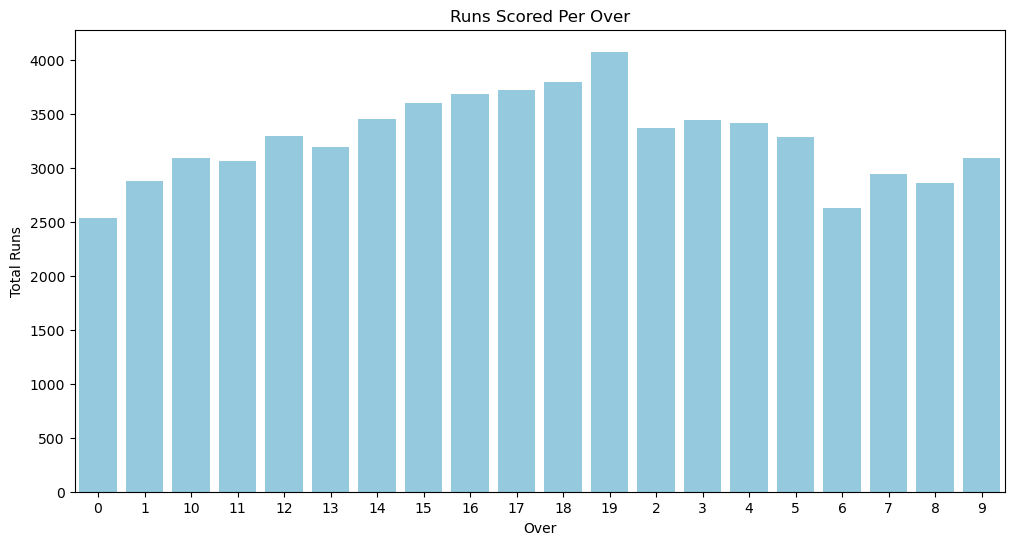

In [232]:
plt.figure(figsize=(12, 6))
runs_per_over = current_data.groupby('over')['runs'].sum().reset_index()
sns.barplot(x='over', y='runs', data=runs_per_over, color='skyblue')
plt.title('Runs Scored Per Over')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.show()


# Visualize Matches per city

In [203]:
matches_per_city = current_data.groupby('city').size().reset_index(name='match_count')


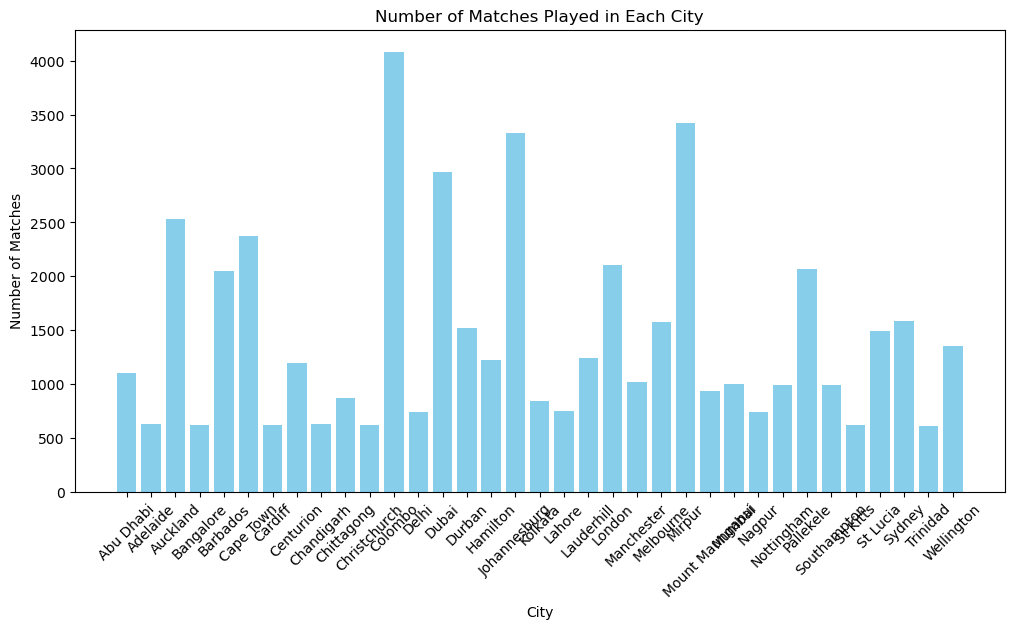

In [205]:
plt.figure(figsize=(12, 6))
plt.bar(matches_per_city['city'], matches_per_city['match_count'], color='skyblue')
plt.title('Number of Matches Played in Each City')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

In [132]:
current_data['balls_bowled'] = (current_data['over'].astype('int') * 6 ) + (current_data['ball_no'].astype('int'))

C:\Users\PMLS\AppData\Local\Temp\ipykernel_13252\3981126001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_data['balls_bowled'] = (current_data['over'].astype('int') * 6 ) + (current_data['ball_no'].astype('int'))


In [134]:
current_data['balls_left'] = 120 - current_data['balls_bowled']
current_data['balls_left'] = current_data['balls_left'].apply(lambda x:0 if x<0 else x)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_13252\2495246209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_data['balls_left'] = 120 - current_data['balls_bowled']
C:\Users\PMLS\AppData\Local\Temp\ipykernel_13252\2495246209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_data['balls_left'] = current_data['balls_left'].apply(lambda x:0 if x<0 else x)


In [136]:
current_data['player_dismissed'] = current_data['player_dismissed'].apply(lambda x:0 if x==0 else 1)
current_data['player_dismissed'] = current_data['player_dismissed'].astype('int')
current_data['player_dismissed'] = current_data.groupby('match_id')['player_dismissed'].cumsum()
current_data['wickets_left'] = 10 - current_data['player_dismissed']

C:\Users\PMLS\AppData\Local\Temp\ipykernel_13252\2144426205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_data['player_dismissed'] = current_data['player_dismissed'].apply(lambda x:0 if x==0 else 1)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_13252\2144426205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_data['player_dismissed'] = current_data['player_dismissed'].astype('int')
C:\Users\PMLS\AppData\Local\Temp\ipykernel_13252\2144426205.py:3: SettingWithCopyWarning: 
A value is try

In [138]:
current_data['total_runs'] = current_data.apply(
    lambda row: row['current_score'] if row['balls_left'] == 0 or row['wickets_left'] == 0 else None,
    axis=1
)


C:\Users\PMLS\AppData\Local\Temp\ipykernel_13252\3347370253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_data['total_runs'] = current_data.apply(


In [139]:
 current_data[current_data['batting_team'] == 'Australia'][['batting_team', 'total_runs']]

,batting_team,total_runs
0,Australia,NaN
1,Australia,NaN
2,Australia,NaN
3,Australia,NaN
4,Australia,NaN
...,...,...
115192,Australia,NaN
115193,Australia,NaN
115194,Australia,NaN
115195,Australia,NaN


In [216]:
current_data['total_runs'].astype('int').fillna(0, inplace=True)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [144]:
current_data

,match_id,batting_team,bowling_team,ball,runs,city,player_dismissed,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,total_runs
0,1,Australia,Sri Lanka,0.1,0,Melbourne,0,0,0,1,1,119,10,NaN
1,1,Australia,Sri Lanka,0.2,0,Melbourne,0,0,0,2,2,118,10,NaN
2,1,Australia,Sri Lanka,0.3,1,Melbourne,0,1,0,3,3,117,10,NaN
3,1,Australia,Sri Lanka,0.4,2,Melbourne,0,3,0,4,4,116,10,NaN
4,1,Australia,Sri Lanka,0.5,0,Melbourne,0,3,0,5,5,115,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115318,963,Sri Lanka,Australia,19.3,1,Colombo,8,125,19,3,117,3,2,NaN
115319,963,Sri Lanka,Australia,19.4,0,Colombo,8,125,19,4,118,2,2,NaN
115320,963,Sri Lanka,Australia,19.5,0,Colombo,9,125,19,5,119,1,1,NaN
115321,963,Sri Lanka,Australia,19.6,2,Colombo,9,127,19,6,120,0,1,127.0


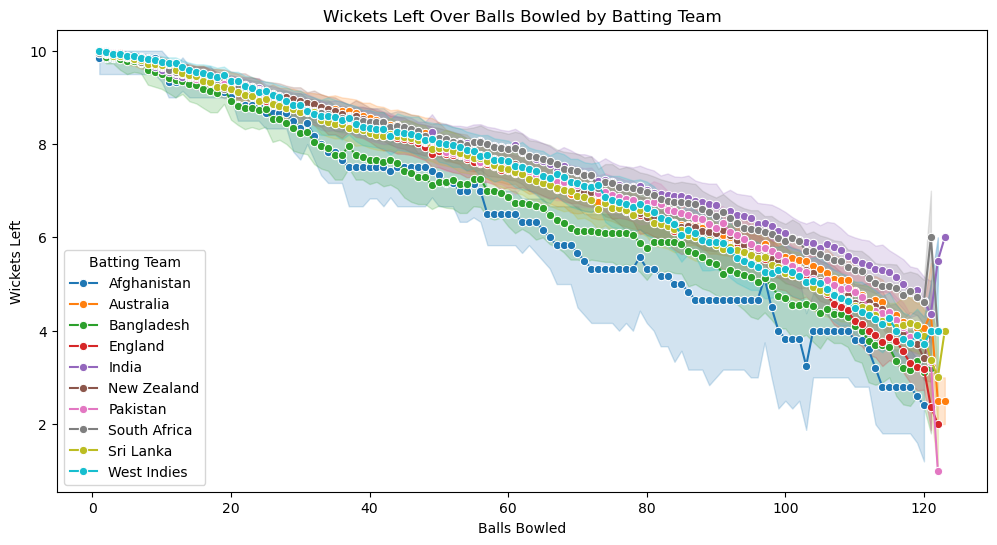

In [224]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='balls_bowled', y='wickets_left', hue='batting_team', data=current_data, marker='o')
plt.title('Wickets Left Over Balls Bowled by Batting Team')
plt.xlabel('Balls Bowled')
plt.ylabel('Wickets Left')
plt.legend(title='Batting Team')
plt.show()


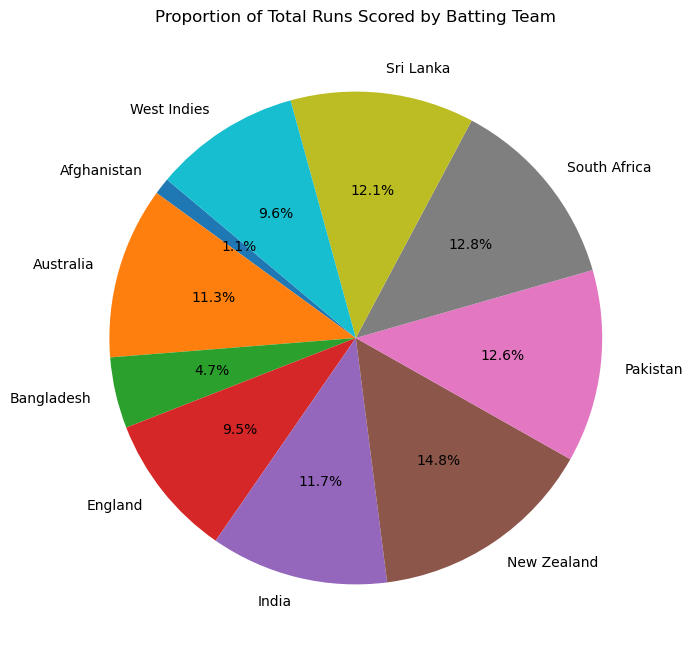

In [234]:
runs_by_team = current_data.groupby('batting_team')['runs'].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(runs_by_team['runs'], labels=runs_by_team['batting_team'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Total Runs Scored by Batting Team')
plt.show()


In [188]:
plot_score = current_data = current_data.sort_values(by=['batting_team', 'balls_bowled'])

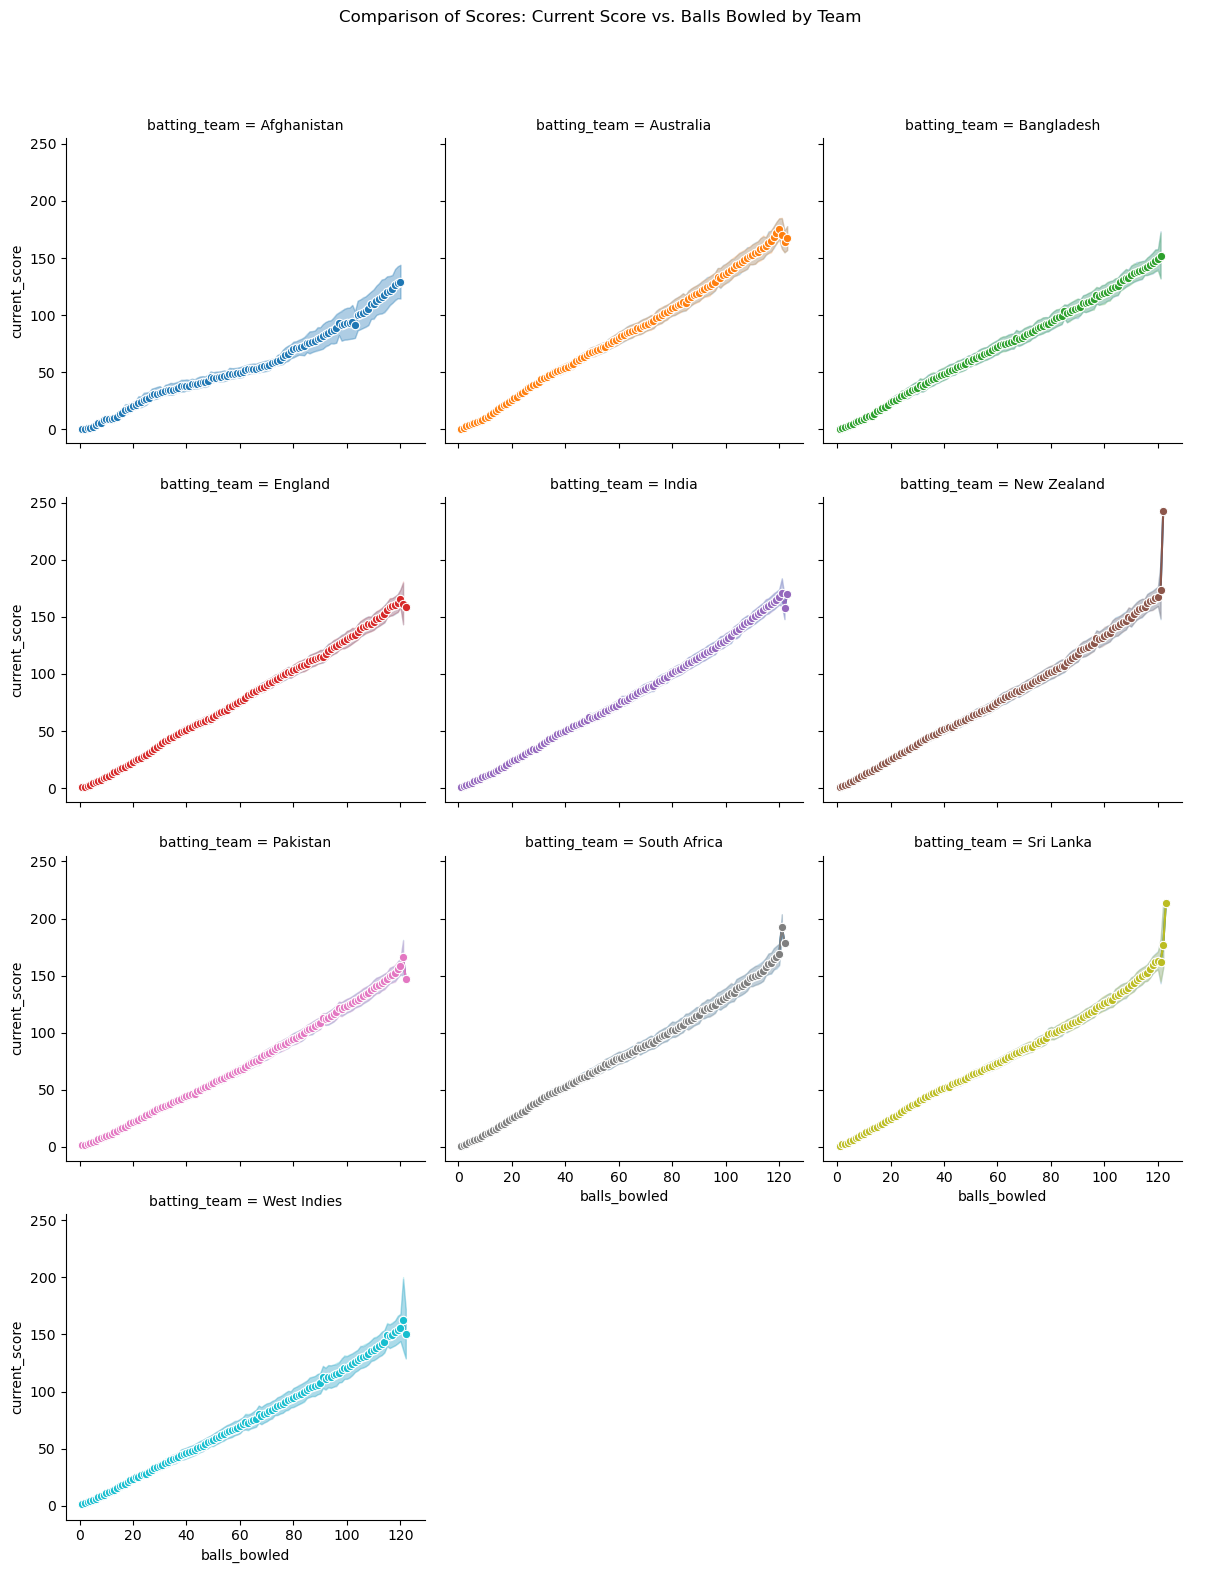

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("tab10", len(current_data['batting_team'].unique()))
g = sns.FacetGrid(current_data, col='batting_team', col_wrap=3, height=4)
g.map(sns.lineplot, 'balls_bowled', 'current_score', marker="o", color=palette[0])

# Loop through each team and assign a different color
for i, ax in enumerate(g.axes.flat):
    sns.lineplot(data=current_data[current_data['batting_team'] == current_data['batting_team'].unique()[i]],
                 x='balls_bowled', y='current_score', marker="o", ax=ax, color=palette[i])

# Add a legend
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Comparison of Scores: Current Score vs. Balls Bowled by Team')
plt.show()


In [146]:
current_data['crr'] = (current_data['current_score'] * 6) / current_data['balls_bowled']

C:\Users\PMLS\AppData\Local\Temp\ipykernel_13252\2259731717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_data['crr'] = (current_data['current_score'] * 6) / current_data['balls_bowled']


In [148]:
current_data

,match_id,batting_team,bowling_team,ball,runs,city,player_dismissed,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,total_runs,crr
0,1,Australia,Sri Lanka,0.1,0,Melbourne,0,0,0,1,1,119,10,NaN,0.000000
1,1,Australia,Sri Lanka,0.2,0,Melbourne,0,0,0,2,2,118,10,NaN,0.000000
2,1,Australia,Sri Lanka,0.3,1,Melbourne,0,1,0,3,3,117,10,NaN,2.000000
3,1,Australia,Sri Lanka,0.4,2,Melbourne,0,3,0,4,4,116,10,NaN,4.500000
4,1,Australia,Sri Lanka,0.5,0,Melbourne,0,3,0,5,5,115,10,NaN,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115318,963,Sri Lanka,Australia,19.3,1,Colombo,8,125,19,3,117,3,2,NaN,6.410256
115319,963,Sri Lanka,Australia,19.4,0,Colombo,8,125,19,4,118,2,2,NaN,6.355932
115320,963,Sri Lanka,Australia,19.5,0,Colombo,9,125,19,5,119,1,1,NaN,6.302521
115321,963,Sri Lanka,Australia,19.6,2,Colombo,9,127,19,6,120,0,1,127.0,6.350000


In [150]:
groups = current_data.groupby('match_id')
match_ids = current_data['match_id'].unique()
last_five = []
for id in match_ids:
    group = groups.get_group(id)
    rolling_sum = group['runs'].rolling(window = 30).sum()
    last_five.extend(rolling_sum.values.tolist())

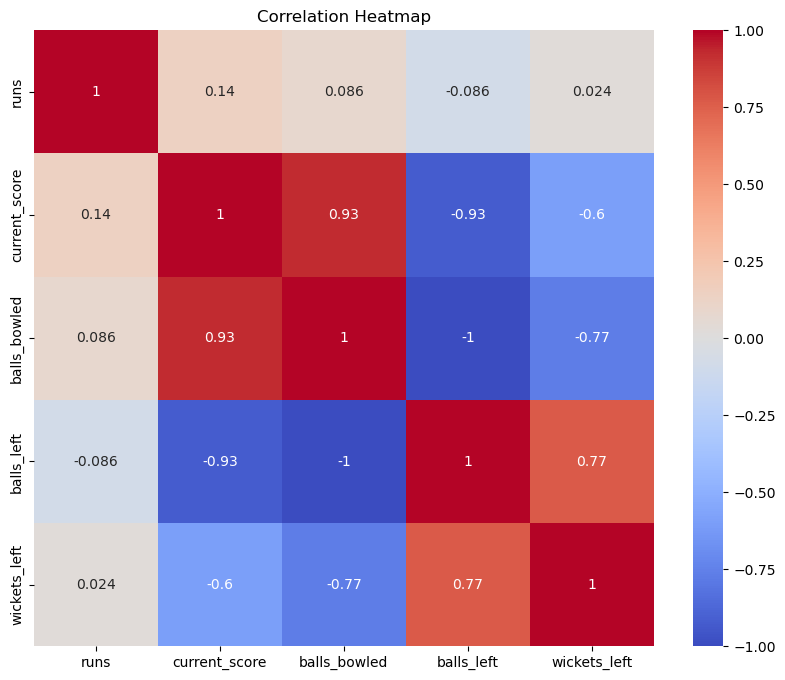

In [236]:
import seaborn as sns
corr = current_data[['runs', 'current_score', 'balls_bowled', 'balls_left', 'wickets_left']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()


In [154]:
current_data['last_five'] = last_five 

C:\Users\PMLS\AppData\Local\Temp\ipykernel_13252\2235842386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_data['last_five'] = last_five


In [156]:
final_df = current_data.groupby('match_id')['runs'].sum().reset_index().merge(current_data,on='match_id')

In [158]:
final_df = final_df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]

In [160]:
final_df.dropna(inplace=True)

In [162]:
final_df = final_df.sample(final_df.shape[0])

In [164]:
final_df.sample(2)

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
22312,India,New Zealand,Christchurch,89,52,4,7.852941,31.0,162
13837,South Africa,England,Cape Town,40,86,9,7.058824,37.0,191


In [166]:
final_df.dtypes

batting_team      object
bowling_team      object
city              object
current_score      int64
balls_left         int64
wickets_left       int32
crr              float64
last_five        float64
runs_x             int64
dtype: object

In [168]:
 X = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']

In [170]:
from sklearn.model_selection import train_test_split

# Train Test Split

In [172]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [174]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Importing libraries

In [176]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [178]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

In [180]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate= 0.2,max_depth=12,random_state=1))
])

# Prediction Accuracy

In [214]:
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 Score of model = ',r2_score(y_test,y_pred))
print('Mean Absolute Error = ',mean_absolute_error(y_test,y_pred))

R2 Score of model =  0.9890624937257404
Mean Absolute Error =  1.605480933478215


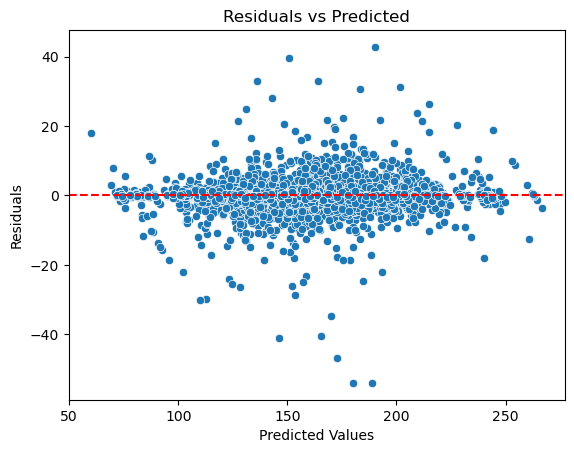

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
